<a href="https://colab.research.google.com/github/FaizAghnial/SalaryPredictionProject/blob/main/Copy_of_First_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Predictions Based on Job Descriptions

# **=== Part 1 - DEFINE ===**

### ---- 1.1 Define the problem ----

As a data scientist, we have given a task to examine a set of job postings with salaries then trying to predict salaries for a new set of job postings. 

In [2]:
__author__ = "Faiz Aghnial Husna "
__email__ = "faiz.aghnialh@gmail.com"

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# import sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **=== Part 2 - DISCOVER ===**

### ---- 2.1 Load the data ----

In [3]:
#load the data into a Pandas dataframe
test_features_df = pd.read_csv('/content/test_features.csv')
train_features_df = pd.read_csv('/content/train_features.csv')
train_salaries_df = pd.read_csv('/content/train_salaries.csv')

### --- 2.2 Examining the Data ---

In [4]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [6]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


### ---- 2.3 Clean the data ----

In [10]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [11]:
test_features_df.duplicated().sum()

0

In [12]:
train_features_df.duplicated().sum()

0

In [13]:
train_salaries_df.duplicated().sum()

0

In [49]:
# To check what variables are available in the table column

In [14]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [50]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']
target_cols = 'salary'

### --- 2.4 Explore the data (EDA) ---

In [16]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [17]:
train_features_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [18]:
train_features_df.describe(include= ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684908235,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### --- 2.5 Merging the data ---

In [19]:
# For simplicity, merging features and salaries table together

In [20]:
train_df = pd.merge(train_features_df, train_salaries_df, on='jobId')

In [21]:
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### --- 2.6 Visualization on target variables to get a brief idea about the data ---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


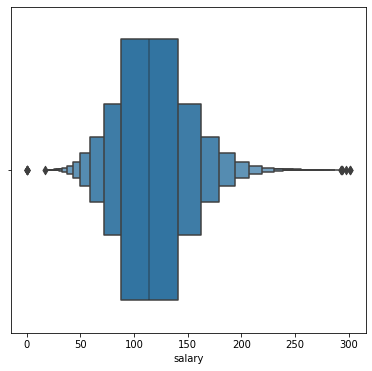

In [23]:
plt.figure(figsize= (14,6))
plt.subplot(1,2,1)
sns.boxenplot(train_df.salary)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


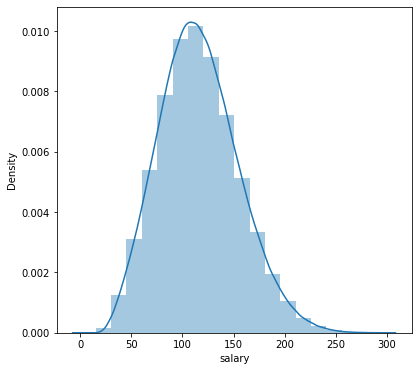

In [24]:
plt.figure(figsize= (14,6))
plt.subplot(1,2,1)
sns.distplot(train_df.salary, bins=20)

## --- 2.7 Check if there is any potential outlier using IQR rule ---

In [25]:
stat = train_df.salary.describe()
print(stat)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [26]:
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 *IQR
print('The upper and lower bound for expected outliers are {} and {}.'.format(upper, lower))

The upper and lower bound for expected outliers are 220.5 and 8.5.


In [27]:
#check potential outlier lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


<< notice the above table has salary of '0', could be a missing value >>

In [28]:
#check potential outlier upper bound 
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

<< in the above table, other positions other than junior could be make sense in their salary for the job. but check on the junior jobType >>

In [29]:
#check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')] 

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


<< as seen above, the junior jobType are mostly in the oil and finance industry that could be has high amount of salary for the junior position >>

In [30]:
#Remove data with zero salaries 
train_df = train_df[train_df.salary > 8.5]
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


--- 2.7 Plot for features in the table ---

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [32]:
def plot_feature(df, col):
  '''
  make plot for each features 
  '''
  plt.figure(figsize= (14, 6))
  plt.subplot(1,2,1)
  if df[col].dtype == 'int64':
    df[col].value_counts().sort_index().plot()
    
  else:
      #
      #
      mean = df.groupby(col)['salary'].mean()
      df[col] = df[col].astype('category')
      levels = mean.sort_values().index.tolist()
      df[col].cat.reorder_categories(levels, inplace= True)
      df[col].value_counts().plot
  plt.xticks(rotation=45)
  plt.xlabel(col)
  plt.ylabel('Counts')
  plt.subplot(1,2,2)

  if df[col].dtype == 'int64' or col == 'companyId':
    #
    mean = df.groupby(col)['salary'].mean()
    std = df.groupby(col)['salary'].std()
    mean.plot()
    plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)

  else:
    sns.boxplot(x=col, y='salary', data=df)

  plt.xticks(rotation=45)
  plt.ylabel('Salaries') 
  plt.show()

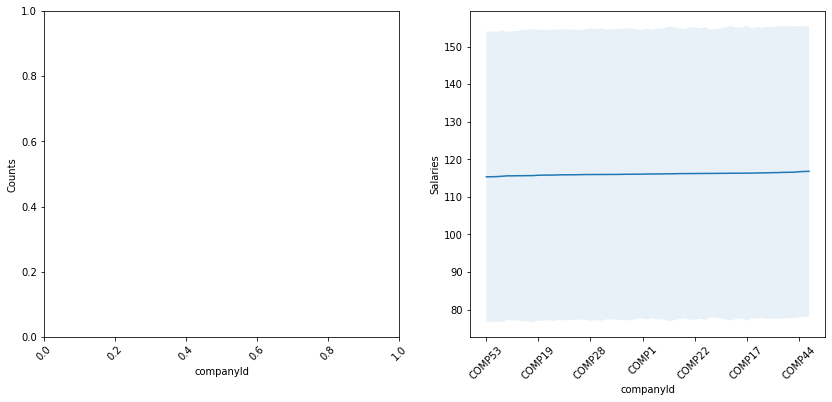

In [33]:
plot_feature(train_df, 'companyId')

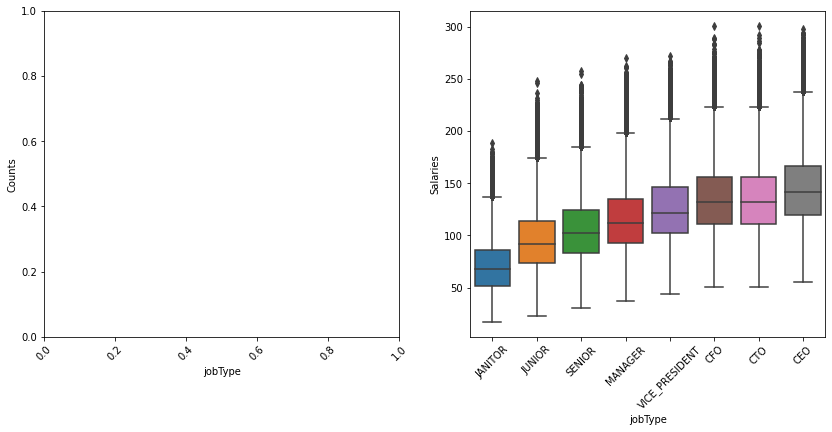

In [34]:
plot_feature(train_df, 'jobType')

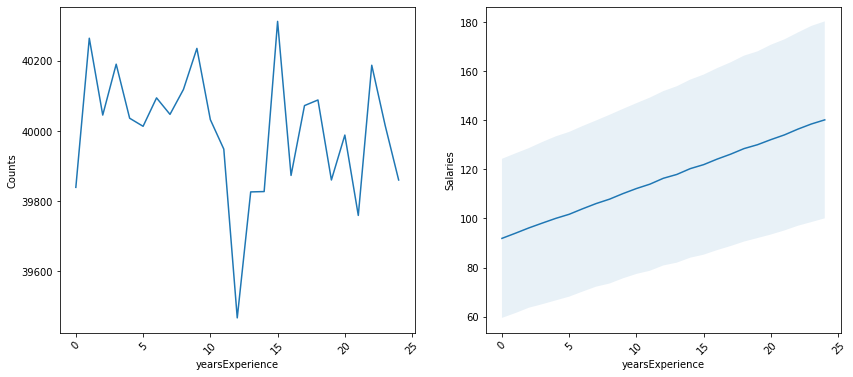

In [35]:
plot_feature(train_df, 'yearsExperience')

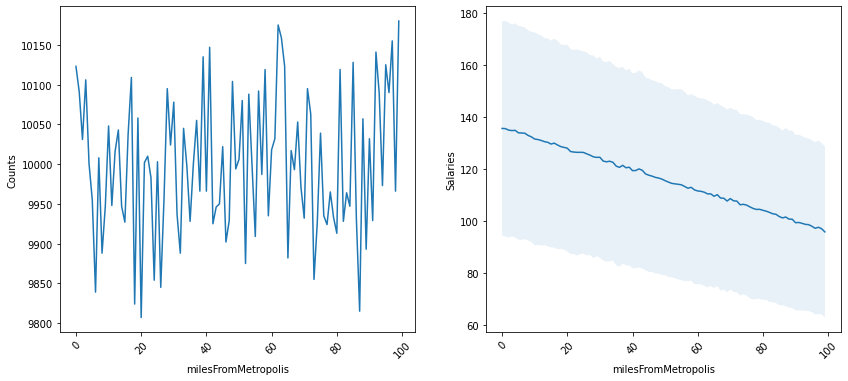

In [36]:
plot_feature(train_df, 'milesFromMetropolis')

Text(0, 0.5, 'Counts')

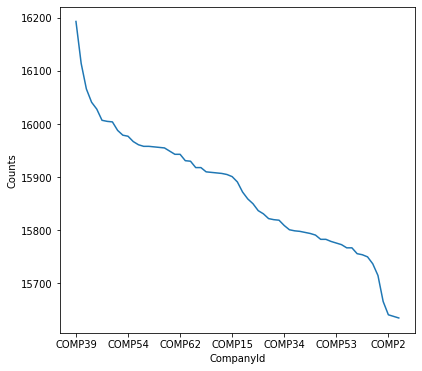

In [37]:
plt.figure(figsize= (14, 6))
plt.subplot(1, 2, 1)
train_df['companyId'].value_counts().plot()
plt.xlabel('CompanyId')
plt.ylabel('Counts')

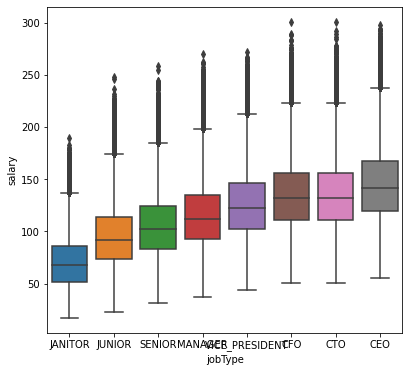

In [38]:
plt.figure(figsize= (14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x= 'jobType', y='salary', data=train_df)


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  object  
 4   major                999995 non-null  object  
 5   industry             999995 non-null  object  
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(2), int64(3), object(4)
memory usage: 102.9+ MB


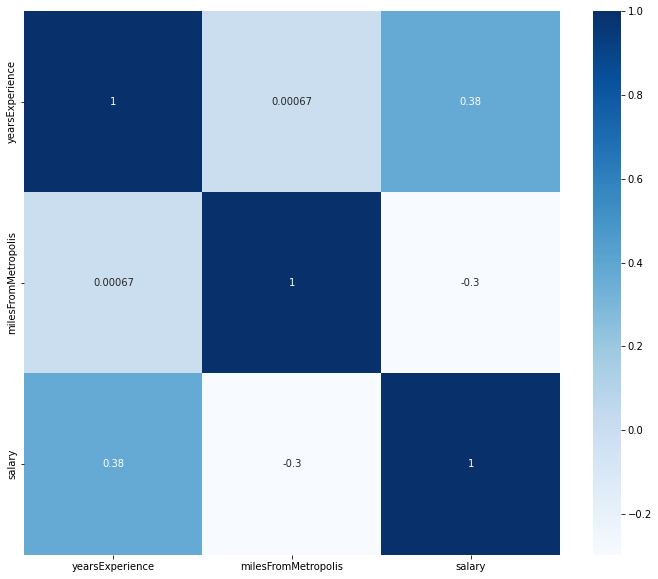

In [40]:
#To see if there is a correlation between variables using Heatmap
figure = plt.figure(figsize= (12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df.corr(), cmap='Blues', annot= True)
plt.show()

### ---- 2.8 Establish a baseline ----

In [41]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [42]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

#  **=== Part 3 - DEVELOP ===**

## You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 3.1 Engineer features  ----

In [56]:
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

In [43]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [53]:
#consolidate training data
raw_train_df = pd.merge(left=train_features_df, right=train_salaries_df, how='inner', on='jobId')

In [54]:
#clean data
clean_df = raw_train_df.drop_duplicates(subset='jobId')
clean_df = clean_df[clean_df.salary>0]

In [55]:
#shuffle, and reindex training data
#shuffling improves cross-validation accuracy
clean_train_df = shuffle(clean_df).reset_index()

In [58]:
#combining all categorical variables and combines result with continuous variables
cat_df = pd.get_dummies(clean_train_df[categorical_vars])
num_df = clean_train_df[numeric_vars].apply(pd.to_numeric)
feature_df = pd.concat([cat_df, num_df], axis=1)

In [59]:
cat_df = pd.get_dummies(test_features_df[categorical_vars])
num_df = test_features_df[numeric_vars].apply(pd.to_numeric)
test_df = pd.concat([cat_df, num_df], axis=1)

In [60]:
def get_target_df(df, target):
  #returns target dataframe
  return df[target]

In [61]:
#get target df
target_df = get_target_df(clean_train_df, target_var)

### ---- 3.2 Create models ----

In [63]:
#initialize model list and dictionaries
models = []
mean_mse = {}
cv_std = {}
res = {}

In [69]:
num_procs = 2

In [65]:
#create models
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=25, min_samples_split=60, max_features=30, verbose=5)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=5)

In [66]:
models.extend([lr, lr_std_pca, rf, gbm])

### ---- 3.3 Test models ----

In [45]:
#do 5-fold cross validation on models and measure MSE

In [74]:
# train model function
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
  neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=2, scoring='neg_mean_squared_error')
  mean_mse[model] = -1.0*np.mean(neg_mse)
  cv_std[model] = np.std(neg_mse)

In [73]:
#print all models function
def print_summary(model, mean_mse, cv_std):
  print('\nModel:\n', model)
  print('Average MSE:\n', mean_mse[model])
  print('Standard deviation during CV:\n', cv_std[model])

In [75]:
#parallel cross-validation models, using MSE as evaluation metric
for model in models:
  train_model(model, feature_df, target_df, 2, mean_mse, cv_std)
  print_summary(model, mean_mse, cv_std)


Model:
 LinearRegression()
Average MSE:
 384.4486416730461
Standard deviation during CV:
 0.41648959382939665

Model:
 Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])
Average MSE:
 384.45330321837
Standard deviation during CV:
 0.41636407489406224

Model:
 RandomForestRegressor(max_depth=25, max_features=30, min_samples_split=60,
                      n_estimators=150, n_jobs=2, verbose=5)
Average MSE:
 367.6232096978214
Standard deviation during CV:
 0.7904904288098749

Model:
 GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=150, verbose=5)
Average MSE:
 357.33209303943266
Standard deviation during CV:
 0.4855318897105576


### ---- 3.4 Select best model  ----

In [76]:
#select the model with the lowest error as your "prodcuction" model
#choose model with lowest MSE 
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=150, verbose=5)


# **=== Part 4 - DEPLOY ===**

### ---- 11 Automate pipeline ----

In [47]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [77]:
#train model on entire dataset
model.fit(feature_df, target_df)

       132         355.5027            1.56m
       133         355.4711            1.47m
       134         355.4164            1.39m
       135         355.3686            1.30m
       136         355.2910            1.21m
       137         355.2581            1.12m
       138         355.2351            1.04m
       139         355.2050           57.09s
       140         355.1670           51.89s
       141         355.1341           46.70s
       142         355.0897           41.50s
       143         355.0588           36.31s
       144         355.0464           31.12s
       145         355.0161           25.93s
       146         354.9721           20.74s
       147         354.9559           15.55s
       148         354.9346           10.37s
       149         354.8952            5.18s
       150         354.8716            0.00s


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=150, verbose=5)

In [78]:
#create predictions based on test data 
predictions = model.predict(test_df)

### ---- 12 Deploy solution ----

In [48]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [83]:
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    
feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

In [91]:
def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')

In [92]:
#save results
save_results(model, mean_mse[model], predictions, feature_importances)

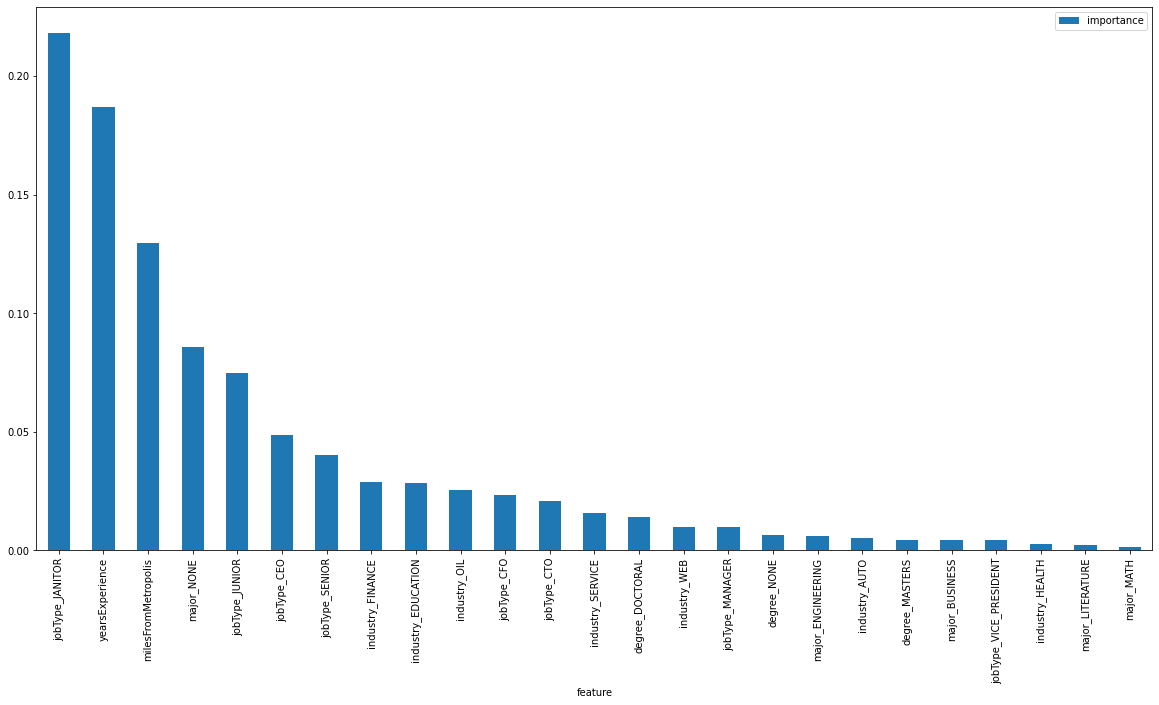

In [93]:
#show in a plot
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

In [94]:
!cat model.txt

GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=150, verbose=5)

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data